In [2]:
from matplotlib import * 
import csv
from pylab import *

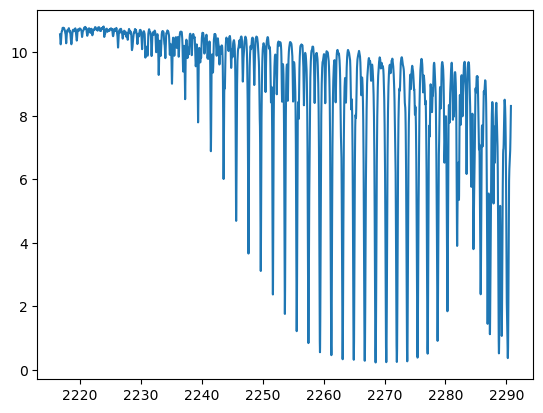

In [3]:
x = zeros((4913,1))
y = zeros((4913,1))
  
with open('CO2_concelda.csv','r') as csvfile: 
    plots = loadtxt(csvfile, delimiter=",")

    for i in range (0,4913): 
        x[i] = plots[i,0]
        y[i] = plots[i,1]
#xlim(2270,2271)
plot(x,y)

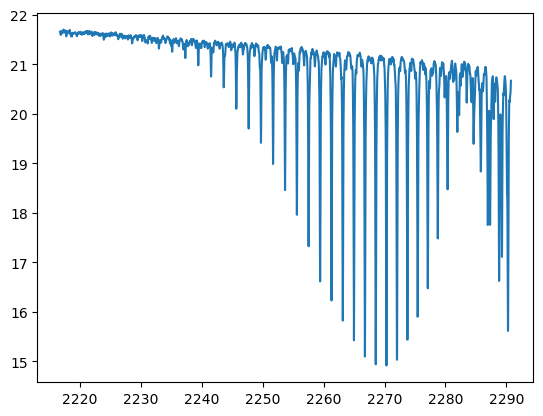

In [6]:
a = zeros((4913,1))
b = zeros((4913,1))
  
with open('CO2_sincelda.csv','r') as csvfile: 
    plots = loadtxt(csvfile, delimiter=",")

    for i in range (0,4913): 
        a[i] = plots[i,0]
        b[i] = plots[i,1]
plot(a,b)

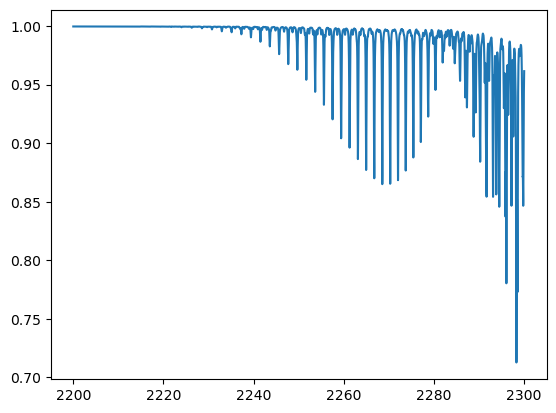

In [4]:
c = zeros((100001,1))
o = zeros((100001,1))

# Este archivo sale del simulador de la comptadora para replicarlo es necesario reemplazar el archivo por los datos simulados deseados
filename='D:\\JAVIER\\Documents\\Física 10º Semestre\\Lab. Contempo 2\\Práctica 4\\linefit\\Resultados\\calcre01.dat'

with open(filename,'r') as csvfile: 
    plots = loadtxt(csvfile)

    for i in range (0,100001): 
        c[i] = plots[i,0]
        o[i] = plots[i,1]

#xlim(2260,2262)
plot(c,o)

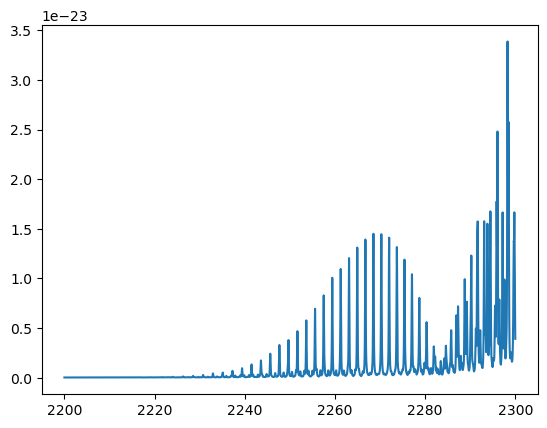

In [7]:
#Simulado contra Con Celda

Const1 = 1

sigma = -np.log(o)/1.0e22
#Col = 1.0e22

plot(c, sigma)

#xlim(2260,2262)
#plot(c,Const1*o,"b") #Simulado
#plot(x,y,"r") #Con celdda

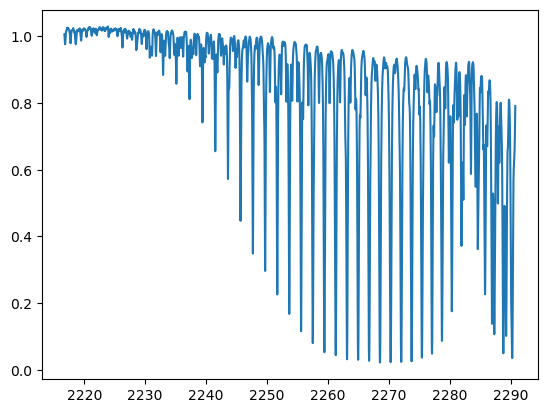

In [8]:
# Con celda
TconCelda = y/10.5
# T = np.exp(-sigam*col)
# A = -ln(T)

plot(x, TconCelda)

(2250.0, 2255.0)

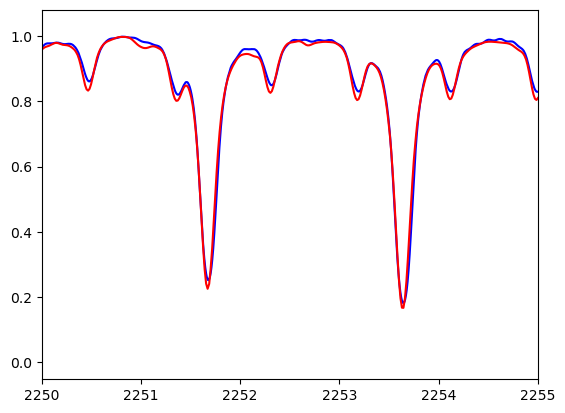

In [9]:
def simuladoT(columna,Io=1.03):
    return Io*np.exp(-sigma*columna)
plot(c,simuladoT(3e23), "b")
plot(x, TconCelda, "r")
xlim([2250,2255])

(2250.0, 2255.0)

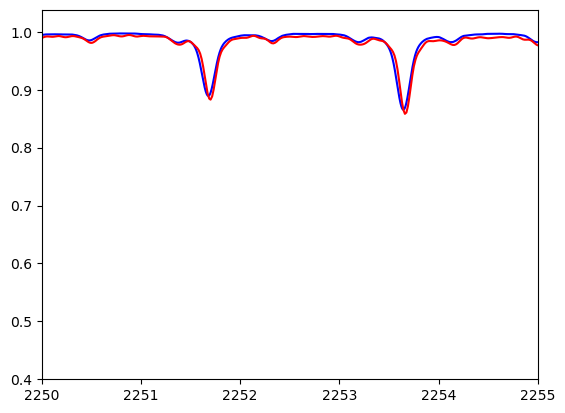

In [10]:
TsinCelda = b/21.5

def simuladoT(columna,Io=1):
    return Io*np.exp(-sigma*columna)
plot(c,simuladoT(0.25e23), "b")
plot(a, TsinCelda, "r")
xlim([2250,2255])

(2260.0, 2265.0)

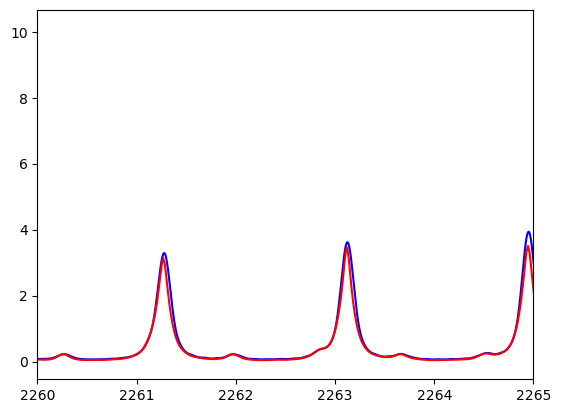

In [11]:
def simuladoA(Acol, A0=0):
    return sigma*Acol+A0
plot(c, simuladoA(3e23), "b")
AconCelda = -np.log(TconCelda)
plot(x, AconCelda, "r")
xlim(2260, 2265)

(2260.0, 2265.0)

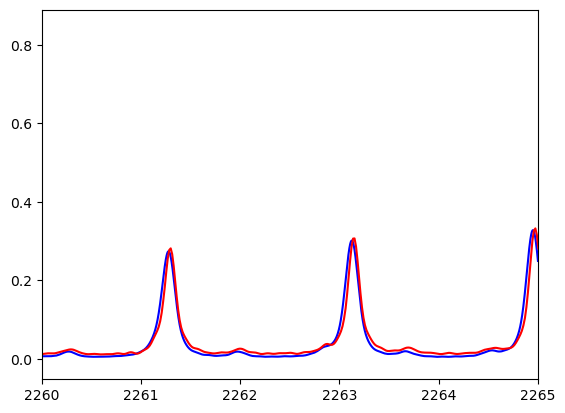

In [12]:
plot(c, simuladoA(0.25e23), "b")
AsinCelda = -np.log(TsinCelda)
plot(x, AsinCelda, "r")
xlim(2260, 2265)

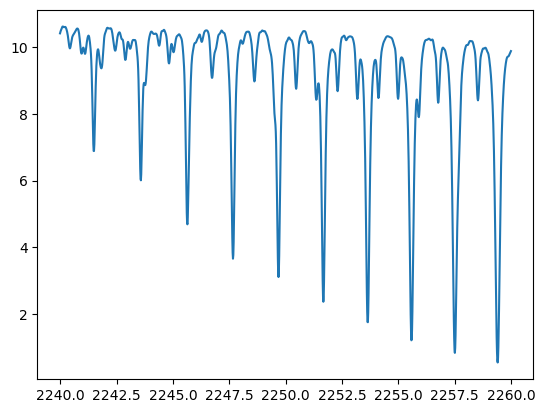

In [13]:
wmin = 2240
wmax = 2260

# Función que corta nuestra gráfica
def corte(x, y, wmin,wmax): 
    imin = np.argmin(abs(x-wmin))
    imax = np.argmin(abs(x-wmax))
    
    xnew = x[imin:imax]
    ynew = y[imin:imax]
    return xnew,ynew

ola = corte(x, y, 2240,2260)

plot(ola[0],ola[1])

[2200.    2200.001 2200.002 ... 2299.998 2299.999 2300.   ]


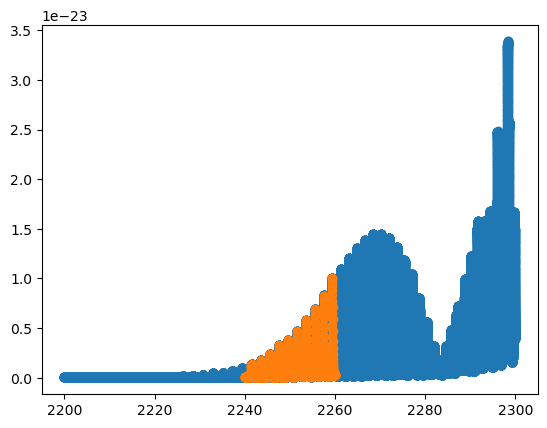

In [27]:


# En este caso WNew es el corte simulado
#WNew,o = corte(c, o, 2240,2260)
# En este caso WOld es el corte medido
wnew,observado = corte(x, y, 2240,2260)
# En este caso SigmaOld es el corte transversal de lo medido, nuestra sigma de antes
SigmaOld = sigma.flatten()
wnew=wnew.flatten()
c=c.flatten()
plot(c,SigmaOld,'o')
#plot(wnew,observado)
#print (SigmaOld)
#print (wnew)
print (c)
SigmaNew = np.interp(wnew,c,SigmaOld)
plot(wnew,SigmaNew,'o')

#xlim([2259.5,2260.0])
show()

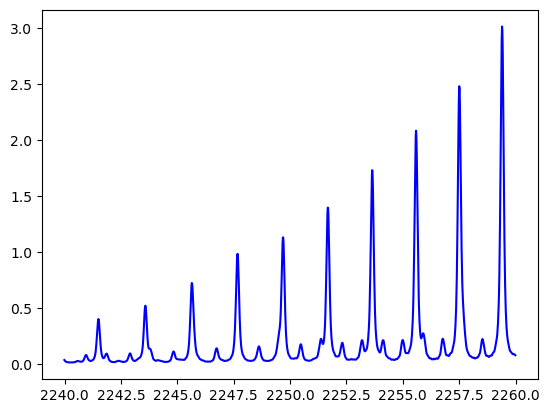

In [30]:
def simuladoAnew(Acol, A0=0):
    return SigmaNew*Acol+A0
plot(wnew, simuladoAnew(3e23), "b")
#xlim(2260, 2265)

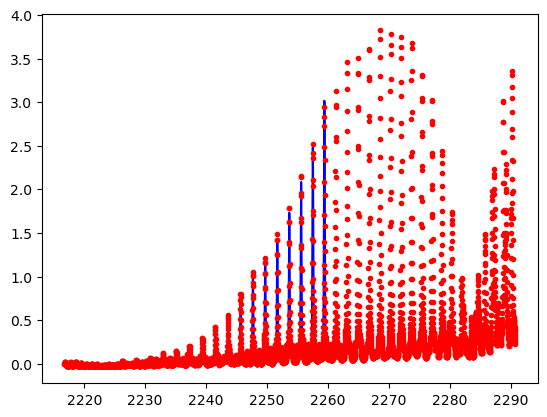

In [36]:
#plot(wnew,SigmaNew,'o')
plot(wnew, simuladoAnew(3e23), "b")
plot(x, AconCelda, ".r")
